# Project Goal:
 * To understand patterns in hospital readmissions and identify what factors are asociated with patient being readmitted within 30 days.

 * To understand who is most likey to be readmitted, and what signals can hospitals act on?


In [1]:
# import dependencies

import pandas as pd #for data manipulation
import numpy as np #for numerical logic
import matplotlib.pyplot as plt # visualization
import seaborn as sns #visualization

In [2]:
# Loading the dataset

df = pd.read_csv("/content/diabetic_data[1].csv")

In [53]:
df.head()

,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,...,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted,readmit_30
0,2278392,8222157,Caucasian,Female,[0-10),?,6,25,1,1,...,No,No,No,No,No,No,No,No,NO,0
1,149190,55629189,Caucasian,Female,[10-20),?,1,1,7,3,...,Up,No,No,No,No,No,Ch,Yes,>30,0
2,64410,86047875,AfricanAmerican,Female,[20-30),?,1,1,7,2,...,No,No,No,No,No,No,No,Yes,NO,0
3,500364,82442376,Caucasian,Male,[30-40),?,1,1,7,2,...,Up,No,No,No,No,No,Ch,Yes,NO,0
4,16680,42519267,Caucasian,Male,[40-50),?,1,1,7,1,...,Steady,No,No,No,No,No,Ch,Yes,NO,0


In [54]:
# structure info

df.shape

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101766 entries, 0 to 101765
Data columns (total 51 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   encounter_id              101766 non-null  int64 
 1   patient_nbr               101766 non-null  int64 
 2   race                      101766 non-null  object
 3   gender                    101766 non-null  object
 4   age                       101766 non-null  object
 5   weight                    101766 non-null  object
 6   admission_type_id         101766 non-null  int64 
 7   discharge_disposition_id  101766 non-null  int64 
 8   admission_source_id       101766 non-null  int64 
 9   time_in_hospital          101766 non-null  int64 
 10  payer_code                101766 non-null  object
 11  medical_specialty         101766 non-null  object
 12  num_lab_procedures        101766 non-null  int64 
 13  num_procedures            101766 non-null  int64 
 14  num_

In [9]:
#Defining the target variable from the dataframe
df['readmitted'].value_counts()


#so 11% patient return within 30 days.

,count
readmitted,
NO,54864
>30,35545
<30,11357


In [12]:
# converting in binary outcome because we have to deal with patient returning within 30 days
# so, 1 = x <30 and 0 for everyone else(NO and >30)

df['readmit_30'] = df['readmitted'].apply(lambda x: 1 if x== '<30' else 0)
df['readmit_30'].value_counts(normalize=True) # normalize gives the value in %

,proportion
readmit_30,
0,0.888401
1,0.111599


In [18]:
# checking for columns having highest no of missing data

df.isnull().sum().sort_values(ascending=False).head(10)


,0
max_glu_serum,96420
A1Cresult,84748
encounter_id,0
gender,0
age,0
weight,0
admission_type_id,0
discharge_disposition_id,0
admission_source_id,0
time_in_hospital,0


In [28]:
# basic EDA for checking categorical and numerical data or variables

categorical_col = df.select_dtypes(include='object').columns  #in pandas object = text/string/category data
len(categorical_col)


37

In [24]:
numerical_col = df.select_dtypes(include=['int','float']).columns
len(numerical_col)

14

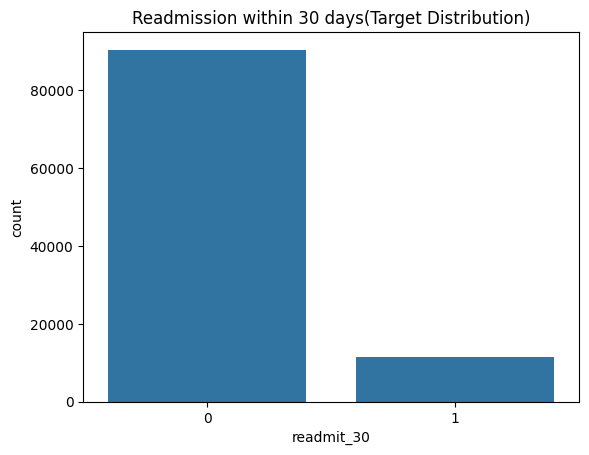

In [35]:
# plotting normal bar chart to check how many patients were admitted within 30 days

sns.countplot(x='readmit_30', data=df)
plt.title("Readmission within 30 days(Target Distribution)")
plt.show()

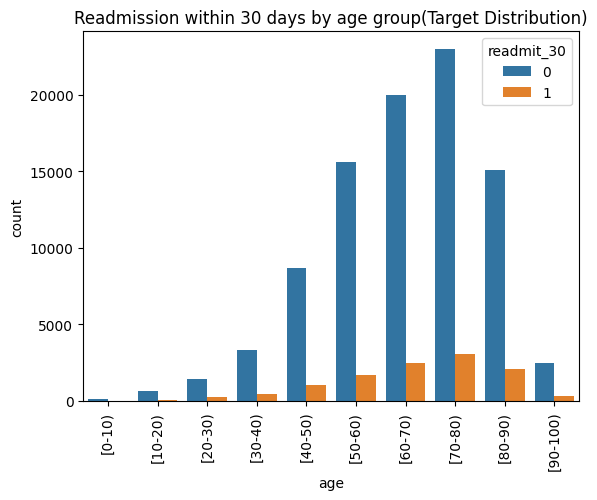

In [44]:
# plotting normal bar chart with age as factor to check how many patients were admitted within 30 days

sns.countplot(x= 'age', hue='readmit_30', data=df)
plt.xticks(rotation=90)
plt.title("Readmission within 30 days by age group(Target Distribution)")
plt.show()

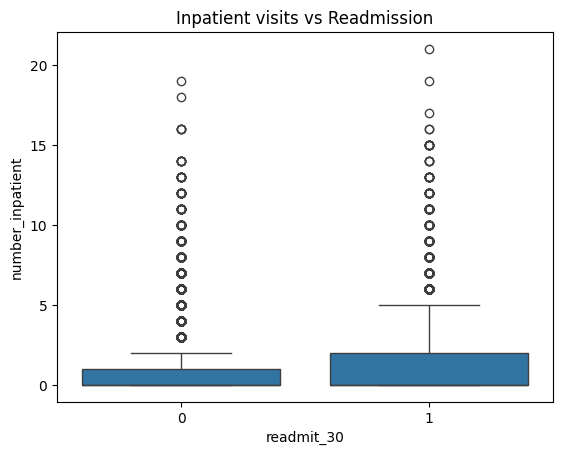

In [47]:
# Checking whether frequent hospital users keep coming back

sns.boxplot(x='readmit_30', y='number_inpatient', data=df)
plt.title('Inpatient visits vs Readmission')
plt.show()

# The plot is showing that patients who get readmitted have higher history of
# more inpatient visits, with a small group of extreme repeat users driving much
# of the readmission process. %%

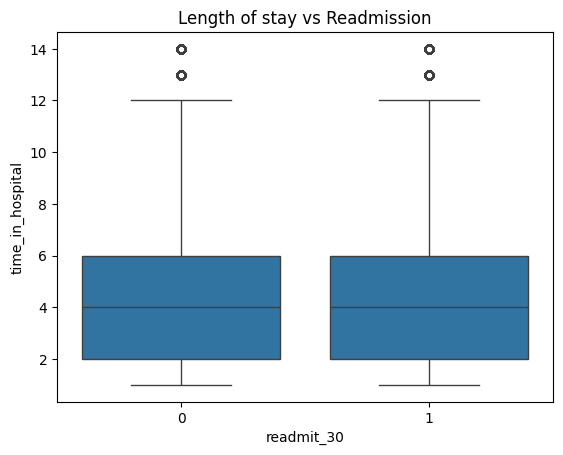

In [52]:
# Checking the length of stay of patients

sns.boxplot(x='readmit_30', y='time_in_hospital', data=df)
plt.title('Length of stay vs Readmission')
plt.show()

# for 0(not readmiited) the median is 4 same as 1(readmitted patients)
# Spread variation is also similar, most patient start around day 2 and stay till 6 days
# The outlier are 13-14 days, showing patients with longer stay

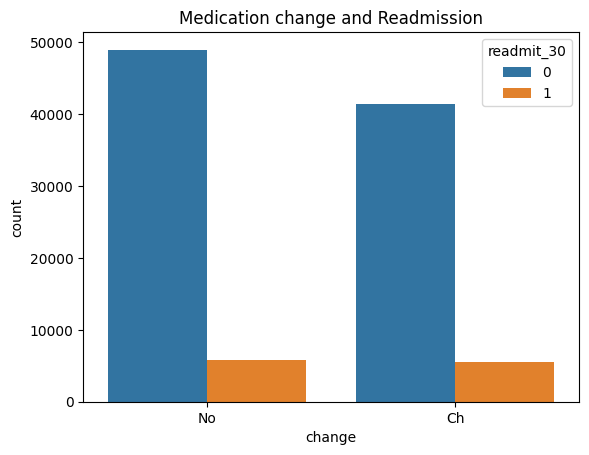

In [64]:
# Checking for medication changes

sns.countplot(x='change', hue='readmit_30',data=df)
plt.title('Medication change and Readmission')
plt.show()

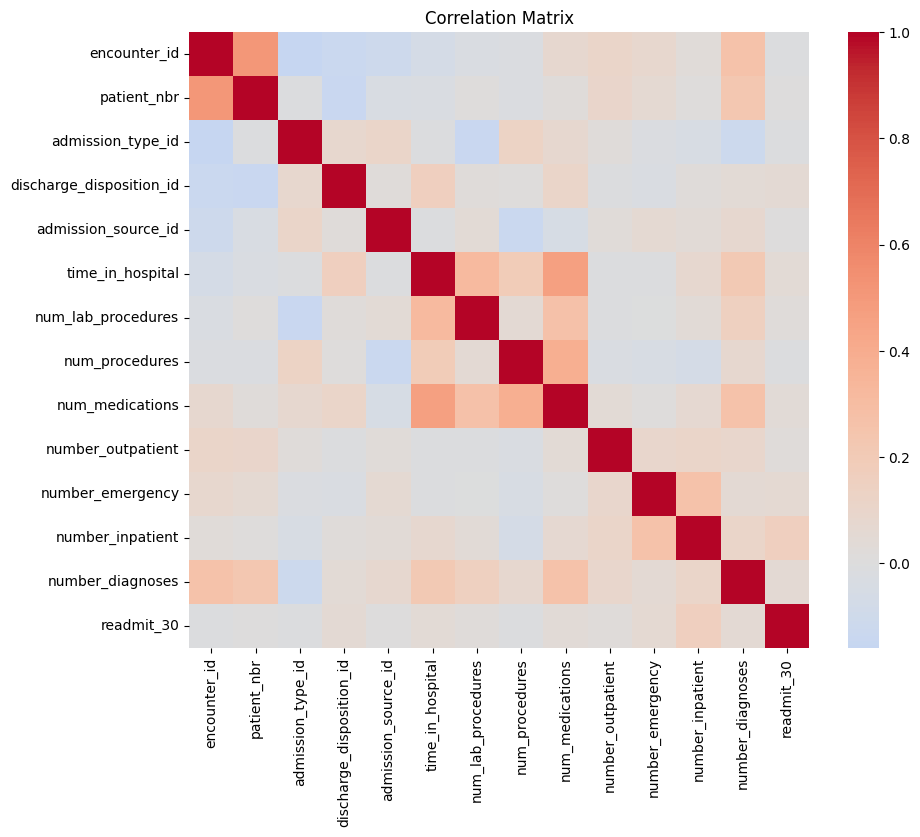

In [62]:
# checking correlation among numerical variables

corr = df[numerical_col].corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr, cmap='coolwarm',center=0)
plt.title("Correlation Matrix")
plt.show()

# 30-day readmission has weak correlations with individual fetures
#Stating that hospital readmission is multifactorial problem rather than something driven by one variable or so.